In [2]:
### Alex Zhang 512910

In [3]:
# The outcome (dependent variable) in this analysis is "Sales," 
# representing the Number of packs of cigarettes sold in a state per person.

## The predictors (independent variable) are Age, HS, Income, Black, Female, Price

### H0: None of the predictors have a significant impact on the cigarette sales
### H1: Some or all of the predictors have impact on the cigarette sales.
### The hypothesis , in this scenario, involves determining whether there are some specific, or all the predictors
### have significant impact on the cigarette sales.


In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot

In [5]:
df = pd.read_csv('cigarette_sales.csv')
df

,Age,HS,Income,Black,Female,Price,Sales
0,27.0,41.3,2948,26.2,51.7,42.7,89.8
1,22.9,66.7,4644,3.0,45.7,41.8,121.3
2,26.3,58.1,3665,3.0,50.8,38.5,115.2
3,29.1,39.9,2878,18.3,51.5,38.8,100.3
4,28.1,62.6,4493,7.0,50.8,39.7,123.0
5,26.2,63.9,3855,3.0,50.7,31.1,124.8
6,29.1,56.0,4917,6.0,51.5,45.5,120.0
7,26.8,54.6,4524,14.3,51.3,41.3,155.0
8,28.4,55.2,5079,71.1,53.5,32.6,200.4
9,32.3,52.6,3738,15.3,51.8,43.8,123.6


In [10]:
summary = df.describe()
summary

,Age,HS,Income,Black,Female,Price,Sales
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,27.466667,53.149020,3763.705882,9.992157,50.950980,38.074510,121.541176
std,1.876983,8.001184,594.715639,12.648318,1.111463,4.128576,32.070374
min,22.900000,37.800000,2626.000000,0.200000,45.700000,29.000000,65.500000
25%,26.400000,48.300000,3271.000000,1.600000,50.750000,34.700000,105.350000
50%,27.400000,53.300000,3751.000000,6.000000,51.100000,38.900000,119.000000
75%,28.750000,59.100000,4116.500000,13.550000,51.500000,41.350000,124.550000
max,32.300000,67.300000,5079.000000,71.100000,53.500000,45.500000,265.700000


In [12]:
df.head()

,Age,HS,Income,Black,Female,Price,Sales
0,27.0,41.3,2948,26.2,51.7,42.7,89.8
1,22.9,66.7,4644,3.0,45.7,41.8,121.3
2,26.3,58.1,3665,3.0,50.8,38.5,115.2
3,29.1,39.9,2878,18.3,51.5,38.8,100.3
4,28.1,62.6,4493,7.0,50.8,39.7,123.0


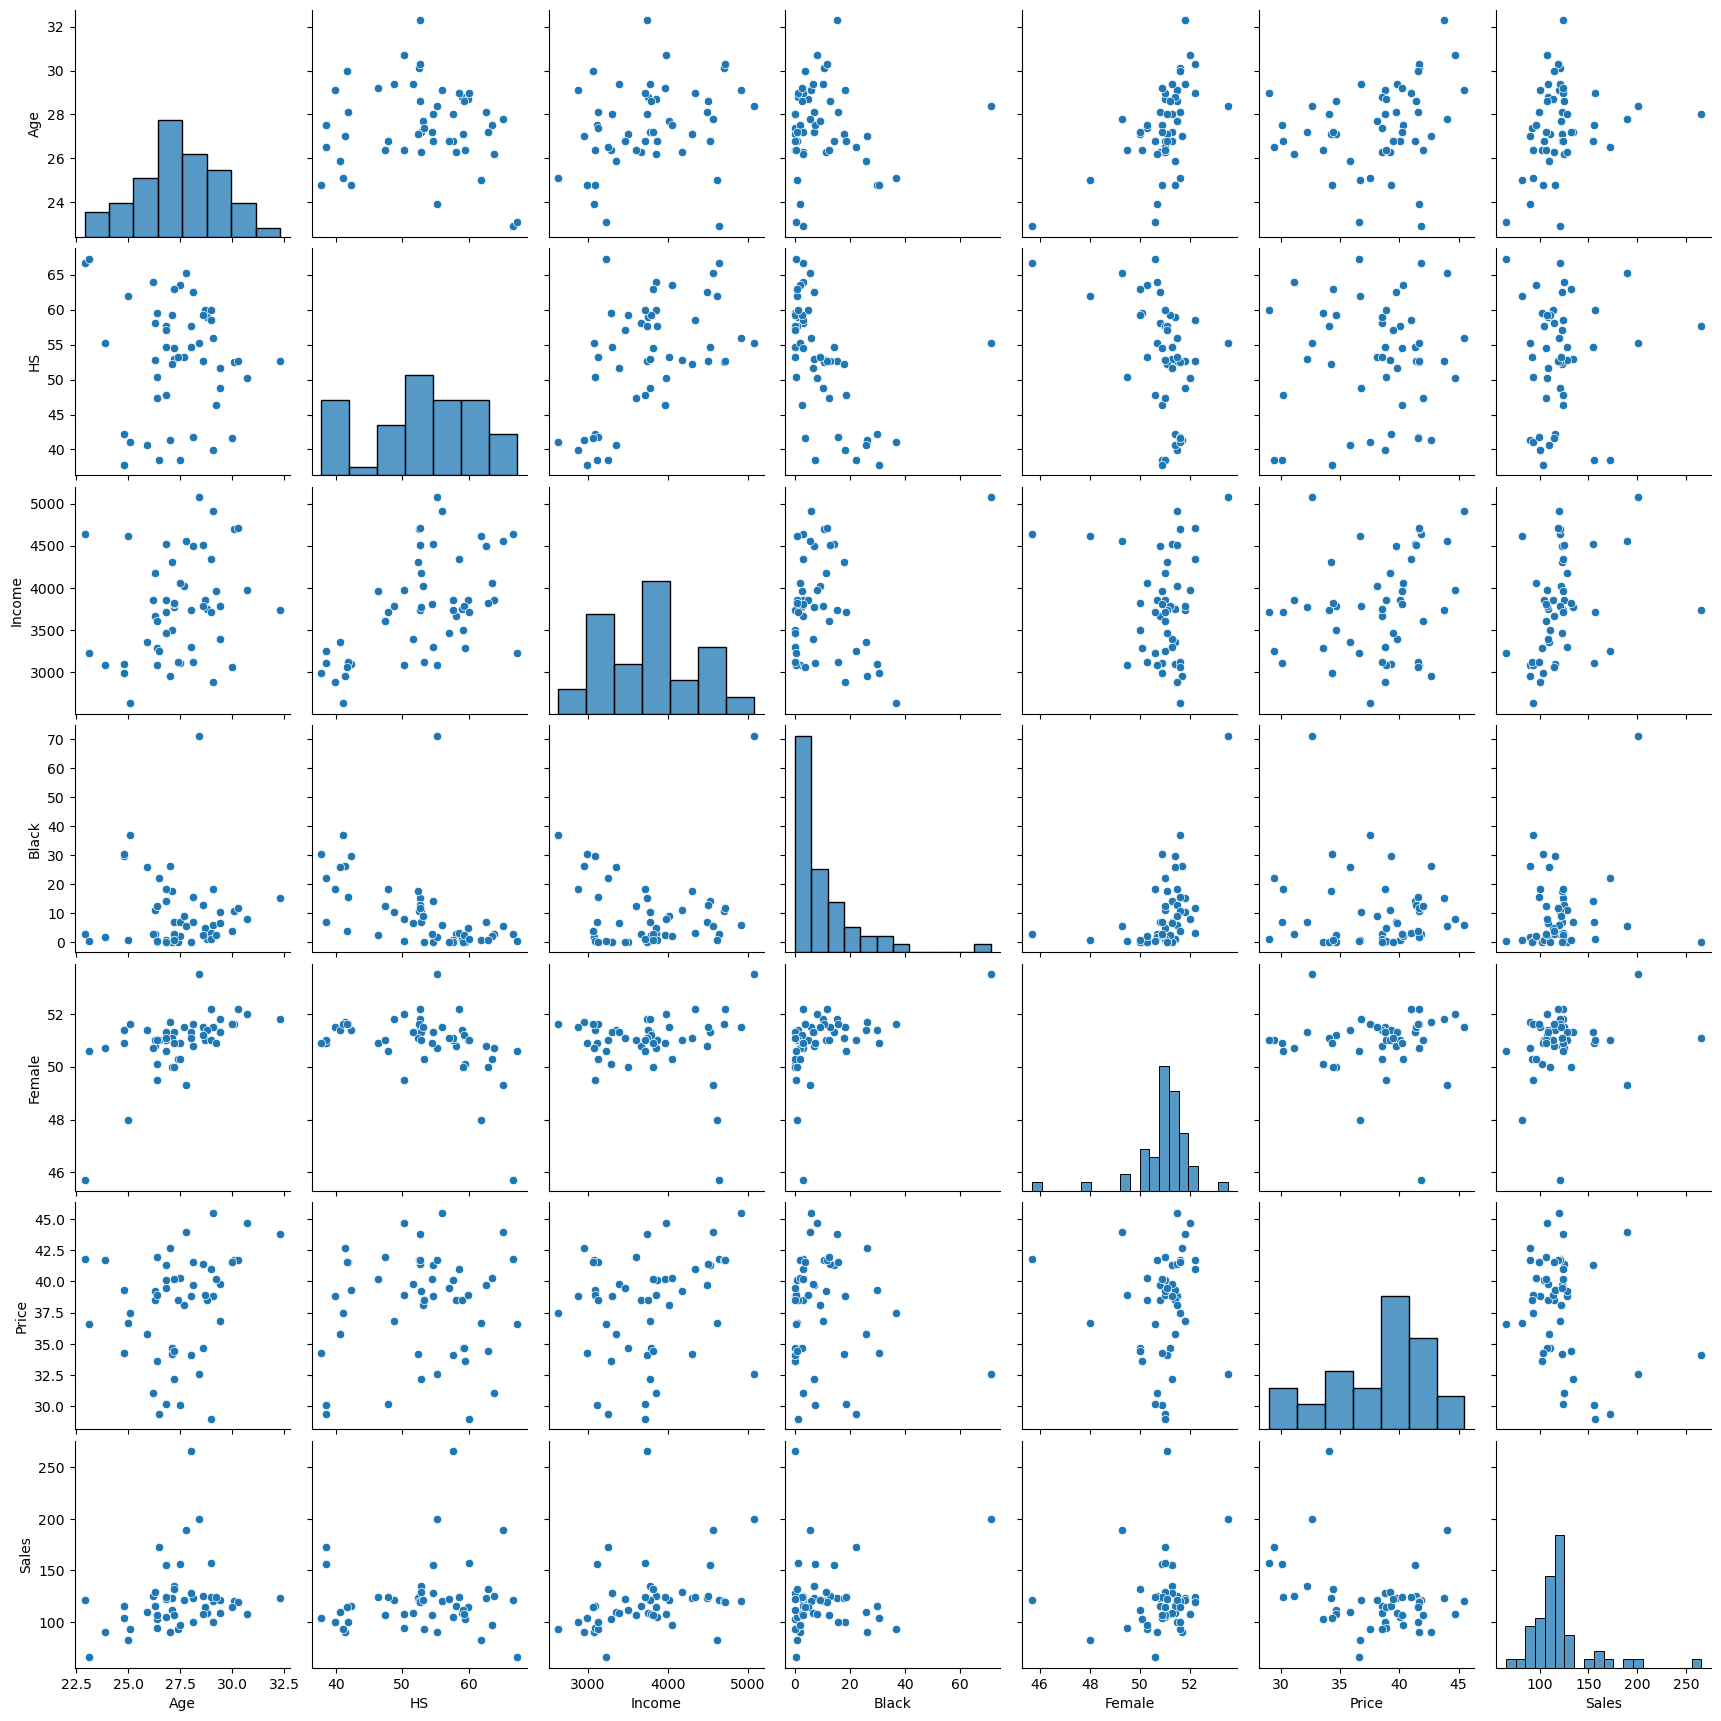

In [7]:
sns.pairplot(df)
plt.show()

In [13]:
# From my observation, Age and HS are negatively correlated. It is normal that younger population 
# has a lower percentage of people >25 years of age who had completed high school.

# Also, Income and HS are positively correlated. The states that have higher percentage of people 
# completing high school tend to have higher per capita incomes.

# Obviously, Price and Sales are negatively correlated. People tend to buy less in the states that have high average price. 

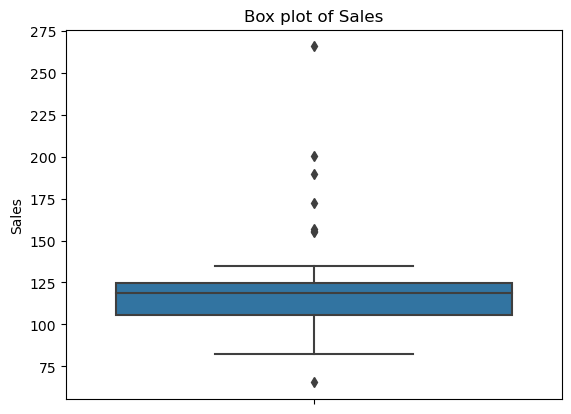

In [14]:
sns.boxplot(y=df['Sales'])
plt.title("Box plot of Sales")
plt.ylabel("Sales")
plt.show()

In [15]:
# I can see from the plot that there might be outliers on the upper side of the box. 
# Some specific states might just have cigarette sales that are significantly higher than that of other states. 

In [17]:
x = df[['Age','HS','Income','Black', 'Female', 'Price']]
y = df['Sales']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.464
Date:                Wed, 27 Sep 2023   Prob (F-statistic):            0.00686
Time:                        21:57:13   Log-Likelihood:                -238.86
No. Observations:                  51   AIC:                             491.7
Df Residuals:                      44   BIC:                             505.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3448    245.607      0.421      0.676    -391.644     598.334
Age            4.5205      3.220      1.404      0.167      -1.969      11.009
HS            -0.0616      0.815     -0.076      0.940      -1.703       1.580
Income         0.0189      0.010      1.855      0.070      -0.002       0.040
Black          0.3575      0.487      0.734      0.467      -0.624       1.339
Female        -1.0529      5.561     -0.189      0.851     -12.260      10.155
Price         -3.2549      1.031     -3.156      0.003      -5.334      -1.176
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.088
Skew:                           2.842   Prob(JB):                     1.75e-78
Kurtosis:                      14.670   Cond. No.                     2.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# From my observation, price is the only variable that is statistically significant. P < 0.05

In [19]:
# When all the independent variables are 0, the expected sales would be 103.3448 which is the meaning of the intercept (constant coefficient)
# This situation only happens in theoretical level since some of the variables such as Age and HS would not be 0 in reality. 

In [20]:
# The coefficient for Price is -3.2549 meaning that for every cent of the price increase of a pack of cigarettes, 
# sales decrease by approximately 3.2549 packs per person.

In [22]:
vif_data = pd.DataFrame()
vif_data['Variable'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_data

,Variable,VIF
0,const,3875.756869
1,Age,2.300617
2,HS,2.676465
3,Income,2.325164
4,Black,2.392152
5,Female,2.406417
6,Price,1.142181


In [23]:
df.corr()

,Age,HS,Income,Black,Female,Price,Sales
Age,1.000000,-0.098916,0.256581,-0.040330,0.553032,0.247757,0.226555
HS,-0.098916,1.000000,0.534005,-0.501712,-0.417378,0.056975,0.066695
Income,0.256581,0.534005,1.000000,0.017288,-0.068827,0.214557,0.326068
Black,-0.040330,-0.501712,0.017288,1.000000,0.450900,-0.147776,0.189590
Female,0.553032,-0.417378,-0.068827,0.450900,1.000000,0.022474,0.146221
Price,0.247757,0.056975,0.214557,-0.147776,0.022474,1.000000,-0.300623
Sales,0.226555,0.066695,0.326068,0.189590,0.146221,-0.300623,1.000000


In [24]:
y2 = df['Sales']
x2 = df.loc[:, ~df.columns.isin(['Sales', 'HS', "Female", "Black"]) ]
x2 = sm.add_constant(x2)
model = sm.OLS(y2, x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     6.818
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           0.000657
Time:                        22:05:30   Log-Likelihood:                -239.51
No. Observations:                  51   AIC:                             487.0
Df Residuals:                      47   BIC:                             494.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2482     61.933      1.037      0.305     -60.345     188.841
Age            4.1559      2.199      1.890      0.065      -0.267       8.579
Income         0.0193      0.007      2.801      0.007       0.005       0.033
Price         -3.3992      0.989     -3.436      0.001      -5.389      -1.409
==============================================================================
Omnibus:                       49.463   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.745
Skew:                           2.504   Prob(JB):                     1.60e-54
Kurtosis:                      12.565   Cond. No.                     6.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# R^2 = 0.303 means the 30.3% of the variance of the dependent variable is explained by the regression model.

In [43]:
# The Original Model of AIC = 491.72
# The Refitted Model of AIC = 488.13
# 488.13 < 491.72 Thus the refitted model is better. 

In [28]:
model_f = 'Sales ~ Age + Income + Price'

model = smf.ols(formula=model_f, data=df)
model_fit = model.fit()
model_fitted_y = model_fit.fittedvalues
model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model_fit.get_influence().hat_matrix_diag
model_cooks = model_fit.get_influence().cooks_distance[0]

model_fitted_y.head(), model_residuals.head()

(0     88.150973
 1    106.871699
 2    113.343124
 3    108.785720
 4    132.709379
 dtype: float64,
 0     1.649027
 1    14.428301
 2     1.856876
 3    -8.485720
 4    -9.709379
 dtype: float64)

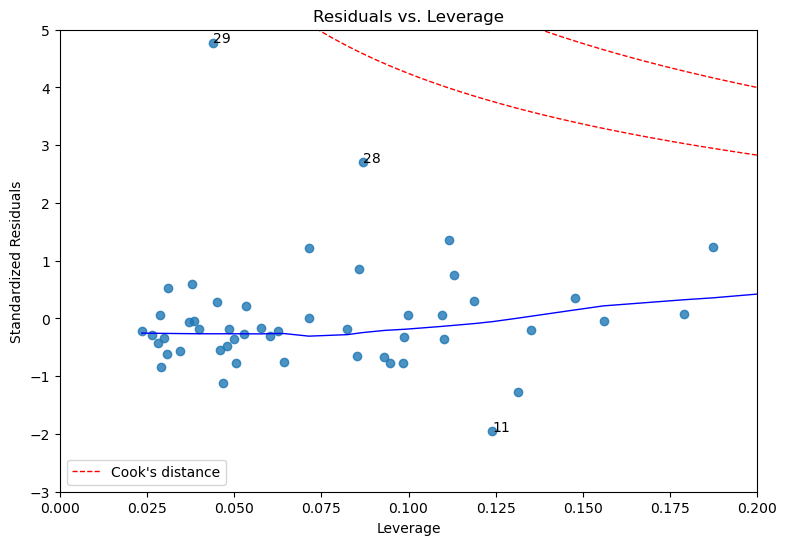

In [41]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(6)
plot_lm_4.set_figwidth(9)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.8)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'blue', 'lw': 1, 'alpha': 1.0})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs. Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

f = len(model_fit.params) 

graph(lambda x: np.sqrt((0.5 * f * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') 

graph(lambda x: np.sqrt((1 * f * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) 

plt.legend(loc='lower left');

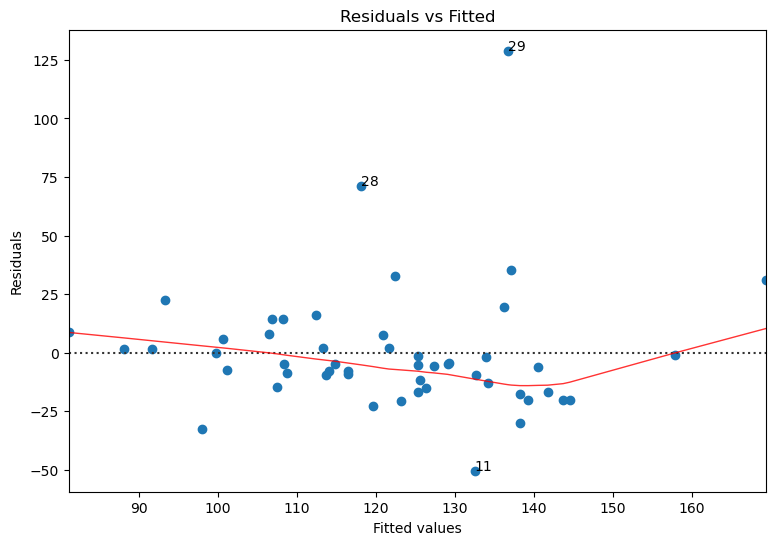

In [42]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(6)
plot_lm_1.set_figwidth(9)

plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y='Sales', data=df,
                                  lowess=True,
                                  scatter_kws={'alpha': 1.0},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

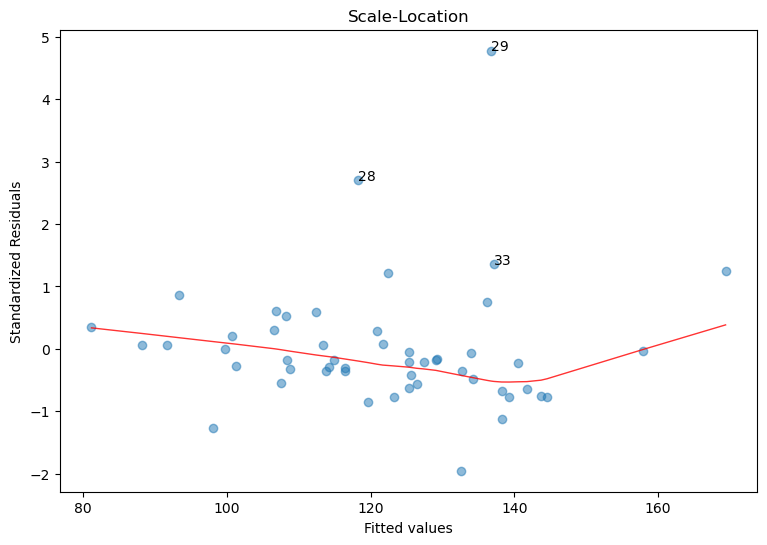

In [35]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(6)
plot_lm_3.set_figwidth(9)

plt.scatter(model_fitted_y, model_norm_residuals, alpha=0.5)
sns.regplot(x=model_fitted_y, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals');

abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_sq_norm_resid_top_3:
    plt.annotate(i, 
                 xy=(model_fitted_y[i], 
                     model_norm_residuals[i]))

plt.show()

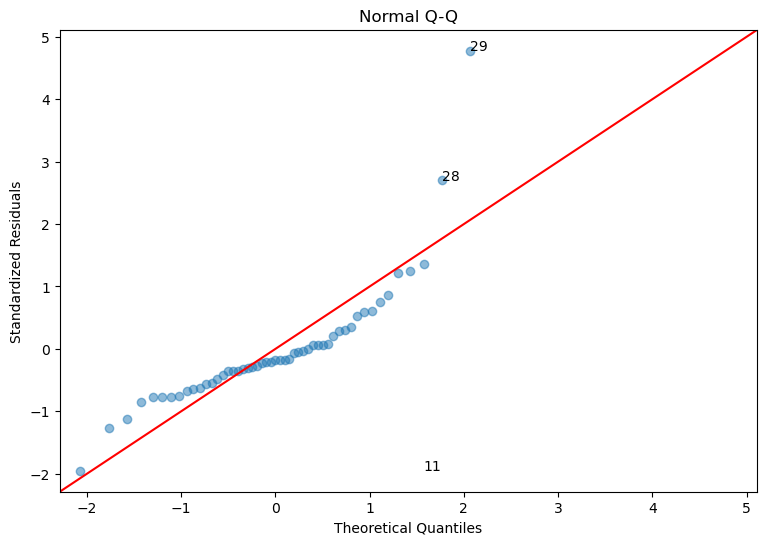

In [36]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

plot_lm_2.set_figheight(6)
plot_lm_2.set_figwidth(9)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));